In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import numpy as np
import multiprocessing
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
import re
import string
import time
from wordcloud import WordCloud
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from sklearn.cluster import KMeans
import xlsxwriter
from adjustText import adjust_text
import pyLDAvis.gensim
from IPython.display import HTML

warnings.filterwarnings(action='ignore')

%matplotlib inline
tqdm.pandas()

color = sns.color_palette("Set2")
cores = multiprocessing.cpu_count()

In [27]:
import pandas as pd
df  = pd.read_table('nlu.md', header=None, names=['message'])
df = df[~df['message'].str.contains('intent')]

In [131]:
df

,message
1,- Australian dollar
2,- Bangladeshi Taka
3,- Chinese Yuan
4,- Danish Krone
5,- Euro
6,- Indian Rupee
7,- Japanese Yen
8,- Renminbi
9,- South Korean Won
10,- Swiss Franc


In [32]:
split_pattern = re.compile(r'\s+')
lemma = WordNetLemmatizer()
str_punct = string.punctuation

stop = nltk.corpus.stopwords.words('english')
extendedStopWords = ["a", "able", "about", "above", "abst", "accordance", "I", "without", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "after", "afterwards", "again", "against", "ah", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", "at", "auth", "available", "away", "awfully", "b", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "between", "beyond", "biol", "both", "brief", "briefly", "but", "by", "c", "ca", "came", "can", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "could", "couldnt", "d", "date", "did", "didn't", "different", "do", "does", "doesn't", "doing", "done", "don't", "down", "downwards", "during", "e", "each", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "et-al", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "few", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "for", "former", "formerly", "forth", "found", "four", "from", "further", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "had", "happens", "hardly", "has", "hasn't", "have", "haven't", "having", "he", "hed", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "hereupon", "hers", "herself", "hes", "hi", "hid", "him", "himself", "his", "hither", "home", "how", "howbeit", "however", "hundred", "i", "id", "ie", "if", "i'll", "im", "immediate", "immediately", "importance", "important", "in", "inc", "indeed", "index", "information", "instead", "into", "invention", "inward", "is", "isn't", "it", "itd", "it'll", "its", "itself", "i've", "j", "just", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "m", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "more", "moreover", "most", "mostly", "mr", "mrs", "much", "mug", "must", "my", "myself", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "now", "nowhere", "o", "obtain", "obtained", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "omitted", "on", "once", "one", "ones", "only", "onto", "or", "ord", "other", "others", "otherwise", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "owing", "own", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "re", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "s", "said", "same", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "she", "shed", "she'll", "shes", "should", "shouldn't", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure	t", "take", "taken", "taking", "tell", "tends", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'll", "theyre", "they've", "think", "this", "those", "thou", "though", "thoughh", "thousand", "throug", "through", "throughout", "thru", "thus", "til", "tip", "to", "together", "too", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "very", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "was", "wasnt", "way", "we", "wed", "welcome", "we'll", "went", "were", "werent", "we've", "what", "whatever", "what'll", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "whose", "why", "widely", "willing", "wish", "with", "within", "wont", "words", "world", "would", "wouldnt", "www", "x", "y", "yes", "yet", "you", "youd", "you'll", "your", "youre", "yours", "yourself", "yourselves", "you've", "z", "zero",'Heh','heh','language','know', 'wow', 'hah', 'hey','really','year', 'yeah','wtf', 'meh', 'oops', 'nah', 'yea','doesnt','dont','make', 'huh', 'mar', 'umm', 'like', 'think','right', 'duh', 'sigh', 'wheres', 'hmm', 'interesting', 'article','good','know', 'say', 'hello', 'yup','im', 'ltsarcasmgt', 'hehe', 'blah', 'nope', 'ouch', 'uh']
stop.extend(extendedStopWords)

contractions = {"ain't": "am not", "aren't": "are not", "can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'll": "he will", "he's": "he is", "how'd": "how did", "i'd": "I would", "i'll": "I will", "i'm": "I am", "i've": "I have", "isn't": "is not", "it'd": "it would", "it'll": "it will", "it's": "it is", "let's": "let us", "ma'am": "madam", "might've": "might have", "must've": "must have", "mustn't": "must not", "needn't": "need not", "o'clock": "of the clock", "shan't": "shall not", "she'd": "she would", "she'll": "she will", "she's": "she is", "should've": "should have", "shouldn't": "should not", "that'd": "that would", "that's": "that is", "there's": "there is", "they'll": "they will", "they're": "they are", "they've": "they have", "wasn't": "was not", "we'd": "we would", "we'll": "we will", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what's": "what is", "when's": "when is", "where's": "where is", "who'll": "who will", "who's": "who is", "why's": "why is", "won't": "will not", "would've": "would have", "wouldn't": "would not", "y'all": "you all", "you'd": "you would", "you'll": "you will", "you're": "you are", "you've": "you have", "how's": "how is", "aint": "am not", "arent": "are not", "cant": "cannot", "couldve": "could have", "couldnt": "could not", "didnt": "did not", "doesnt": "does not", "dont": "do not", "hadnt": "had not", "hasnt": "has not", "havent": "have not", "im": "I am", "ive": "I have", "isnt": "is not", "itll": "it will", "lets": "let us", "maam": "madam", "mightve": "might have", "mustve": "must have", "mustnt": "must not", "neednt": "need not", "shant": "shall not", "shouldve": "should have", "shouldnt": "should not", "thats": "that is", "theyll": "they will", "theyre": "they are", "theyve": "they have", "wasnt": "was not", "werent": "were not", "whatll": "what will", "whats": "what is", "wholl": "who will", "wont": "will not", "wouldve": "would have", "wouldnt": "would not", "yall": "you all", "youll": "you will", "youre": "you are", "youve": "you have", "hows": "how is"}

In [36]:


def clean_text(doc):
    token = [i for i in split_pattern.split(doc) if i not in stop]
    token = [str1.strip(str_punct) for str1 in token]
    token = [str1.lstrip(str_punct) for str1 in token]
    
    token = [lemma.lemmatize(word) for word in token]
    return token

In [37]:
messages = df['message'].progress_apply(lambda x: clean_text(x))


100%|██████████| 26/26 [00:00<00:00, 2545.15it/s]


In [38]:
messages

1                   [, Australian, dollar]
2                    [, Bangladeshi, Taka]
3                      [, Chinese, Yuan, ]
4                        [, Danish, Krone]
5                                 [, Euro]
6                        [, Indian, Rupee]
7                        [, Japanese, Yen]
8                             [, Renminbi]
9                   [, South, Korean, Won]
10                        [, Swiss, Franc]
11              [, United, States, Dollar]
13                            [, transfer]
14                     [, transfer, money]
16                     [, , list, account]
17                           [, , account]
18                           [, , account]
19                 [, , account, detail, ]
21                      [, , credit, card]
22                [, , list, credit, card]
23              [, , credit, card, detail]
24         [, , credit, card, outstanding]
26           [, , Please, bank, statement]
27                   [, , bank, statement]
28         

In [59]:
messages_tfidf = df['message'].progress_apply(lambda x: " ".join(clean_text(x)))
tfidf_vectorizer = TfidfVectorizer(max_df=0.99, min_df=0.01, use_idf=True, ngram_range=(1,3), norm='l2')
tfidf_matrix = tfidf_vectorizer.fit_transform(messages_tfidf)

100%|██████████| 26/26 [00:00<00:00, 2494.67it/s]


In [60]:
terms = tfidf_vectorizer.get_feature_names()

print("Number of terms: ",len(terms))
## sum tfidf frequency of each term through documents
sums = tfidf_matrix.sum(axis=0)

## connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

## You can sort words based IDF score or create a word cloud for better data visualization.
ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', inplace=True, ascending=False)

weights = {}
for index, row in ranking.iterrows() :
    weights.update({row['term'] : row['rank']})

Number of terms:  74


In [61]:
ranking.head(10)

,term,rank
0,account,2.988871
11,card,1.634478
17,credit card,1.634478
16,credit,1.634478
66,transfer,1.531536
58,statement,1.411133
6,bank,1.246463
7,bank statement,1.246463
37,list,1.213901
22,detail,1.000131


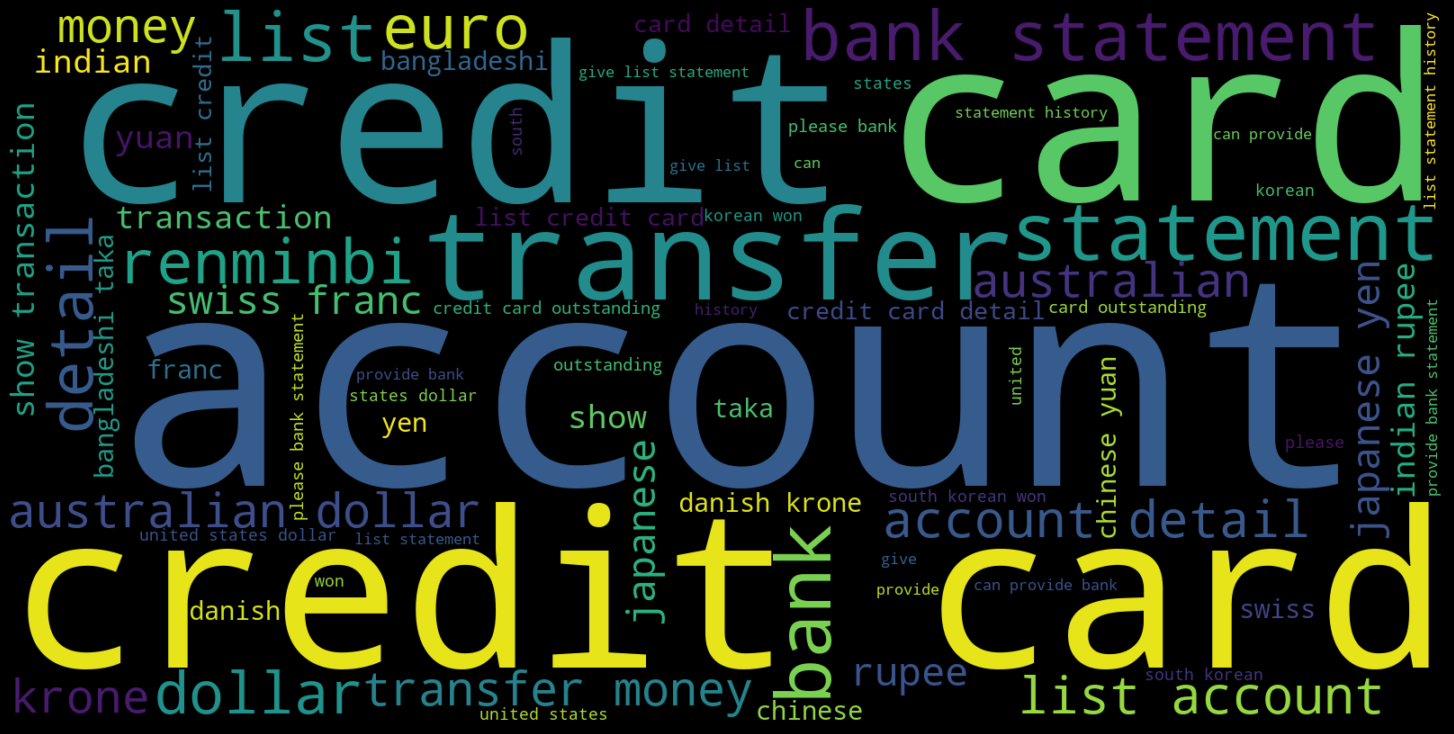

In [62]:
def create_wordcloud(weights):
    plt.figure(figsize=(20, 10), facecolor='k')
    wc = WordCloud(width=1600, height=800)
    wc.generate_from_frequencies(weights)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
create_wordcloud(weights)

In [63]:
ranking.tail(10)

,term,rank
48,provide,0.356678
10,can provide bank,0.356678
8,can,0.356678
59,statement history,0.349040
42,list statement history,0.349040
29,history,0.349040
28,give list statement,0.349040
27,give list,0.349040
26,give,0.349040
41,list statement,0.349040


In [64]:
def visualize_word_embeddin(words, wvs):
    
    tsne = TSNE(n_components=2, n_iter=5000, random_state=0, perplexity=5)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(wvs)
    
    labels = words
    
    plt.figure(num=1, figsize= (10, 10))
    plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
    texts = []
    for label, x, y in zip(labels, T[:, 0], T[:, 1]):
        texts.append(plt.text(x, y, label))
    adjust_text(texts, only_move={'points': 'y', 'text':
                                 'y'},
               arrowprops=dict(arrowprops='->', color='r', lw=0.5))
    plt.show()

In [65]:
import spacy

nlp = spacy.load('en_core_web_md')

total_words = len(nlp.vocab.vectors)
print(total_words)

20000


In [66]:
unique_words = list(set([word for sublist in messages for word in sublist]))

top_words = [word for word in unique_words if word in ranking['term'].values]

word_glove_vectors = np.array([nlp(word).vector for word in top_words])

AttributeError: 'FancyArrowPatch' object has no property 'arrowprops'

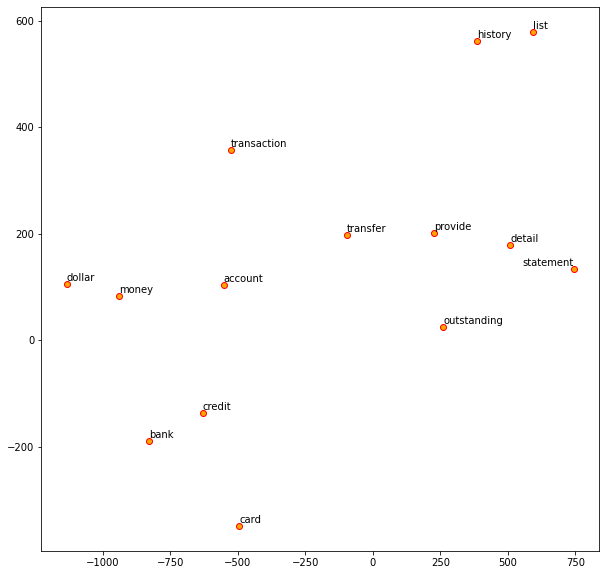

In [67]:
visualize_word_embeddin(top_words, word_glove_vectors)

In [68]:
def documentTopicMatrix (model, doc_term_matrix) :
    import operator
    from functools import reduce
    from collections import defaultdict
    import pandas as pd
    a = reduce(operator.concat, model[doc_term_matrix])
    d = defaultdict(list)
    for tup in a:
        d[tup[0]] += (tup[1],)
    df = pd.DataFrame.from_dict(d)
    doc_topic_matrix = df.values
    return doc_topic_matrix

In [94]:
def createDocTermMatrix (messages) :
    # Creating the term dictionary of our corpus, where every unique term is assigned an index.
    dictionary = corpora.Dictionary(messages)

    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in messages]
    return dictionary, doc_term_matrix

In [95]:
def createLDAMalletModel (messages, num_topics) :
    dictionary, doc_term_matrix = createDocTermMatrix(messages)
    
    ## Running and Training LDA mallet model on the document term matrix.
    ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=doc_term_matrix, num_topics=num_topics, id2word=dictionary)

    return ldamallet, doc_term_matrix, dictionary

In [96]:
def createLDAModel (message, num_topics) :
    dictionary, doc_term_matrix = createDocTermMatrix(message)
    
    ## Creating the object for LDA model using gensim library
    Lda = gensim.models.ldamodel.LdaModel
    
    ## Running and Training LDA model on the document term matrix.
    ldamodel = Lda(doc_term_matrix, num_topics=num_topics, id2word = dictionary, passes=500, alpha='auto', minimum_probability=0.0)

    return ldamodel, doc_term_matrix, dictionary

In [97]:
def computeCoherenceModel (model, texts, dictionary) :

    coherence_model_lda = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    
    return coherence_lda

In [98]:
def computeOptimalNumTopics (texts, limit, modelName = 'LDAMallet', start=2, step=1):
    from operator import itemgetter
    coherence_values = []
    for num_topics in tqdm(range(start, limit, step)):
        if (modelName == 'LDA') :
            model, doc_term_matrix, dictionary = createLDAModel(texts, num_topics)
        elif (modelName == 'LDAMallet'):
            model, doc_term_matrix, dictionary = createLDAMalletModel(texts, num_topics)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    # Show graph
    x = range(start, limit, step)
    max_num_topic = max(zip(coherence_values,list(x)),key=itemgetter(0))[1]
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

    return max_num_topic

In [99]:
def kMeans(n_cluster, doc_topic_matrix) :
    from sklearn.metrics import silhouette_score
    km = KMeans(n_clusters=n_cluster)
    pred = km.fit_predict(doc_topic_matrix)
    # Sum_of_squared_distances.append(km.inertia_)
    score = silhouette_score(doc_topic_matrix, pred, metric='euclidean')
    sum_of_squared_distance = km.inertia_

    return score, sum_of_squared_distance

In [100]:
def OptimalK(messages, num_topics, limit, modelName = 'LDAMallet', start = 2) :
    from operator import itemgetter
    
    if (modelName == 'LDA'):
        model, doc_term_matrix, dictionary = createLDAModel(messages, num_topics)
    elif (modelName == 'LDAMallet'):
        model, doc_term_matrix, dictionary = createLDAMalletModel(messages, num_topics)

    doc_topic_matrix = documentTopicMatrix(model, doc_term_matrix)
    Sum_of_squared_distances = []
    silhouette_score_list = []
    K = range(start, limit)
    
    for k in tqdm(K) : 
        score, sum_of_squared_distance = kMeans(k,doc_topic_matrix)
        silhouette_score_list.append(score)
        Sum_of_squared_distances.append(sum_of_squared_distance)
        
    max_num_cluster = max(zip(silhouette_score_list,list(K)),key=itemgetter(0))[1]
    plt.plot(K, silhouette_score_list, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette_score for optimal k')
    plt.show()
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow_method for optimal k')
    plt.show()

    return max_num_cluster

In [107]:
def kmeansClustering (messages, actual_messages, num_topics, n_clusters, modelName = 'LDA') :

    if (modelName == 'LDA'):
        model, doc_term_matrix, dictionary = createLDAModel(messages, num_topics)
    elif (modelName == 'LDAMallet'):
        model, doc_term_matrix, dictionary = createLDAMalletModel(messages, num_topics)
        
    doc_topic_matrix = documentTopicMatrix(model, doc_term_matrix)

    km = KMeans(n_clusters=n_clusters)
    km.fit(doc_topic_matrix)
    clustered_Message = zipClusterMessages(km, actual_messages)
    return clustered_Message

In [108]:
def zipClusterMessages (km, actual_messages, intentName) :
    clustered_Message = []
    # Get cluster assignment labels
    clusters = km.labels_.tolist()
    for i in sorted(zip(clusters, map(str, actual_messages), intentName)):
        clustered_Message.append(i)
    return clustered_Message

In [109]:
def saveClusteredMessagetToExcel (file_name, clustered_Message) :
    # Create a workbook and add a worksheet.
    workbook = xlsxwriter.Workbook(file_name)
    worksheet = workbook.add_worksheet("clustered")

    # Iterate over the data and write it out row by row.
    for row, line in enumerate(clustered_Message):
        for col, cell in enumerate(line):
            worksheet.write(row, col, cell)

    workbook.close()

In [121]:
def main(file_name, startNumTopics, limitNumTopics, startNumCluster, limitNumCluster) :
    print("Calculating best number of topics...")
    num_topics = computeOptimalNumTopics(texts=messages, start=startNumTopics, limit=limitNumTopics, modelName="LDA")
    print("Best number of topics are ", num_topics)
    print("Calculating best number of clusters...")
    n_clusters = OptimalK(messages= messages, num_topics=num_topics , start=startNumCluster, limit=limitNumCluster, modelName="LDA")
    print("Best number of clusters are ", n_clusters)
    clustered_Message = kmeansClustering(messages, df['message'].tolist(), num_topics, n_clusters, "LDA")
    saveClusteredMessagetToExcel(file_name, clustered_Message)

In [122]:
print(createDocTermMatrix(messages))

(<gensim.corpora.dictionary.Dictionary object at 0x7faaf6227160>, [[(0, 1), (1, 1), (2, 1)], [(0, 1), (3, 1), (4, 1)], [(0, 2), (5, 1), (6, 1)], [(0, 1), (7, 1), (8, 1)], [(0, 1), (9, 1)], [(0, 1), (10, 1), (11, 1)], [(0, 1), (12, 1), (13, 1)], [(0, 1), (14, 1)], [(0, 1), (15, 1), (16, 1), (17, 1)], [(0, 1), (18, 1), (19, 1)], [(0, 1), (20, 1), (21, 1), (22, 1)], [(0, 1), (23, 1)], [(0, 1), (23, 1), (24, 1)], [(0, 2), (25, 1), (26, 1)], [(0, 2), (25, 1)], [(0, 2), (25, 1)], [(0, 3), (25, 1), (27, 1)], [(0, 2), (28, 1), (29, 1)], [(0, 2), (26, 1), (28, 1), (29, 1)], [(0, 2), (27, 1), (28, 1), (29, 1)], [(0, 2), (28, 1), (29, 1), (30, 1)], [(0, 2), (31, 1), (32, 1), (33, 1)], [(0, 2), (32, 1), (33, 1)], [(0, 2), (34, 1), (35, 1)], [(0, 2), (26, 1), (33, 1), (36, 1), (37, 1)], [(0, 2), (32, 1), (33, 1), (38, 1), (39, 1)]])


  0%|          | 0/18 [00:00<?, ?it/s]

Calculating best number of topics...


100%|██████████| 18/18 [02:17<00:00,  7.63s/it]


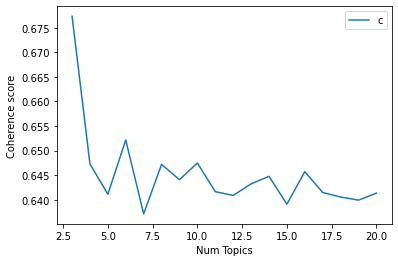

Best number of topics are  3
Calculating best number of clusters...


 48%|████▊     | 22/46 [00:04<00:04,  4.95it/s]


ValueError: n_samples=26 should be >= n_clusters=27.

In [123]:
output_file_name = "output_1.xlsx"
startNumberTopics = 3
limitNumberTopics = 20 + 1
startNumberCluster = 5
limitNumberCluster = 50 + 1
start = time.time()  # Start time
main(output_file_name, startNumberTopics, limitNumberTopics, startNumberCluster, limitNumberCluster)
end = time.time() # End time
print("Finished in ", end-start)

In [124]:
model, doc_term_matrix, dictionary = createLDAModel(
    messages, 3)

In [127]:
doc_topic_matrix = documentTopicMatrix(model, doc_term_matrix)

In [129]:
model, doc_term_matrix

(<gensim.models.ldamodel.LdaModel at 0x7faaf61eae48>,
 [[(0, 1), (1, 1), (2, 1)],
  [(0, 1), (3, 1), (4, 1)],
  [(0, 2), (5, 1), (6, 1)],
  [(0, 1), (7, 1), (8, 1)],
  [(0, 1), (9, 1)],
  [(0, 1), (10, 1), (11, 1)],
  [(0, 1), (12, 1), (13, 1)],
  [(0, 1), (14, 1)],
  [(0, 1), (15, 1), (16, 1), (17, 1)],
  [(0, 1), (18, 1), (19, 1)],
  [(0, 1), (20, 1), (21, 1), (22, 1)],
  [(0, 1), (23, 1)],
  [(0, 1), (23, 1), (24, 1)],
  [(0, 2), (25, 1), (26, 1)],
  [(0, 2), (25, 1)],
  [(0, 2), (25, 1)],
  [(0, 3), (25, 1), (27, 1)],
  [(0, 2), (28, 1), (29, 1)],
  [(0, 2), (26, 1), (28, 1), (29, 1)],
  [(0, 2), (27, 1), (28, 1), (29, 1)],
  [(0, 2), (28, 1), (29, 1), (30, 1)],
  [(0, 2), (31, 1), (32, 1), (33, 1)],
  [(0, 2), (32, 1), (33, 1)],
  [(0, 2), (34, 1), (35, 1)],
  [(0, 2), (26, 1), (33, 1), (36, 1), (37, 1)],
  [(0, 2), (32, 1), (33, 1), (38, 1), (39, 1)]])

In [130]:
doc_topic_matrix

array([[0.01761801, 0.4955923 , 0.48678973],
       [0.46100587, 0.49161097, 0.04738322],
       [0.01439594, 0.94685459, 0.03874949],
       [0.01761805, 0.9349336 , 0.04744829],
       [0.02269831, 0.91622168, 0.06108005],
       [0.01761805, 0.93493372, 0.0474482 ],
       [0.01761805, 0.93493384, 0.04744808],
       [0.02269836, 0.65594131, 0.32136032],
       [0.01439599, 0.94681501, 0.03878901],
       [0.01761801, 0.49559313, 0.48678887],
       [0.01439599, 0.94681484, 0.03878917],
       [0.30705515, 0.63192785, 0.061017  ],
       [0.46236029, 0.4902713 , 0.04736844],
       [0.01439586, 0.94690543, 0.03869868],
       [0.01761791, 0.93504238, 0.04733965],
       [0.01761791, 0.9350425 , 0.04733965],
       [0.01217013, 0.95511878, 0.03271107],
       [0.01439586, 0.94691622, 0.0386879 ],
       [0.01217013, 0.95511299, 0.03271689],
       [0.01217014, 0.95511365, 0.03271622],
       [0.01217016, 0.95509893, 0.03273088],
       [0.01217014, 0.49458668, 0.49324313],
       [0.